#Kruskal Algorithm using Union Find Dataset
##Defining class UnionFind and Graph as data structures

In [ ]:
class UnionFind:
    parent = {}
    # stores the depth of trees
    rank = {}
 
    def init(self, n): 
        # create n (number of vertices) sets, I start from 1 because the vertices in graphs start with 1
        i = 1
        while i < n +1:
            self.parent[i] = i
            self.rank[i] = 0
            i = i + 1
 
    def find(self, k):
        # if `k` is the root
        if self.parent[k] == k:
          return k
        else: 
          self.parent[k] = self.find(self.parent[k])
          return self.parent[k]
         

    def union(self, a, b):
        # find the parents of the two vertices
        x = self.find(a)
        y = self.find(b)
 
        # if `x` and `y` are present in the same set => 
        if x == y:
            return
 
        # Always attach a smaller depth tree under the root of the deeper tree.
        if self.rank[x] > self.rank[y]:
            self.parent[y] = x
        elif self.rank[x] < self.rank[y]:
            self.parent[x] = y
        else:
            self.parent[x] = y
            self.rank[y] = self.rank[y] + 1

class Graph :
  def __init__(self, vertices, edges):
      #number of vertices in the graph
      self.V = vertices
      #number of edges in the graph
      self.E = edges
      #vertices1, vertices2, weight
      self.graph = []

  def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

Function to create a graph from the data

In [ ]:
def create_graph(data):
  g = Graph(int(data[0][0]), int(data[0][1]))
  i = 1
  while(i < len(data)-1):
    values = data[i]
    g.add_edge(int(values[0]), int(values[1]), int(values[2]))
    i = i +1 
  return g

##Implementation of Kruskal Algorithm

In [ ]:
def kruskal_algo(g):
  tot_weight = 0
  result = []
  #initialize UnionFind data structure
  u = UnionFind()
  u.init(g.V)
  #sort edges by weight
  g.graph = sorted(g.graph, key=lambda item: item[2])
  edg = 0 

  while edg < g.E - 1: #for each edge e(v, w) do
    v, w, weight = g.graph[edg] #take the edge informations
    edg = edg + 1
    if u.find(v) != u.find(w):
      result.append([v, w, weight])
      u.union(v, w)
      tot_weight += weight
  return result, tot_weight



Plotting the table with weight of results


In [8]:
from time import perf_counter_ns
import gc
import os

data_set = " C:\Users\Fahad\Desktop\mst_dataset\ "

num_istances = 68
files = os.listdir(data_set)
files = sorted(files)

def report_weight_result(files):
  num_vertices = []
  weights = []
  for filename in files:
    f = os.path.join(data_set, filename)
    if os.path.isfile(f):
      #read file and get the data
      file = open(f,'r')
      data = file.read().split("\n")
      for i in range(len(data) - 1):
        data[i] = data[i].split(" ")
      #creating the graph
      g = create_graph(data)
      num_vertices.append(g.V)
      r, w = kruskal_algo(g)
      weights.append(w)
  return num_vertices, weights

vertices, weights = report_weight_result(files)

print("Size\tWeight of result")
print(20*"-")
for i in range(len(vertices)):
  print(vertices[i], weights[i], sep="\t")
print(20*"-")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 3-4: truncated \UXXXXXXXX escape (Temp/ipykernel_17180/31453426.py, line 5)

##Measuring algorithm's efficency

Importing the files from the dataset

This function return the average run time and the total time for all the graphs in the data set

In [14]:
from time import perf_counter_ns
import gc
import os

data_set = " C:\Users\Fahad\Desktop\mst_dataset "
num_istances = 68
files = os.listdir(data_set)
files = sorted(files)

def measure_run_time(list, num_calls, num_instances):
  sum_times = 0.0
  
  # iterate over files in the list given
  for filename in list:
    f = os.path.join(data_set, filename)
    # checking if it is a file
    if os.path.isfile(f):
      #read file and get the data
      file = open(f,'r')
      data = file.read().split("\n")
      for i in range(len(data) - 1):
        data[i] = data[i].split(" ")
      #creating the graph
      g = create_graph(data)

      gc.disable()
      start_time = perf_counter_ns()
      for i in range(num_calls):
        kruskal_algo(g)
      end_time = perf_counter_ns()
  
      gc.enable()
      sum_times += (end_time - start_time)/num_calls
  avg_time = int(round(sum_times/num_instances))
    # return average time in nanoseconds
  return avg_time, sum_times, g.V

avg_time, sum_times, v = measure_run_time(files, 10, num_istances)
print("Average time (ns):", avg_time, "Total time (ns):", sum_times)
    


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 3-4: truncated \UXXXXXXXX escape (Temp/ipykernel_17180/464745838.py, line 5)

Plotting as a table the different run times for graphs with different number of edges. 


In [ ]:
from typing_extensions import runtime_checkable
import math
import os

data_set = '/mst_dataset'
files = os.listdir(data_set)
files = sorted(files)
#we have 68 graphs
num_istances = 68

num_calls = 10

run_times = []
vertices_size = []


i = 0
while i < num_istances:

  run, tot, n = measure_run_time(files[i:i+4], num_calls, 4)
  run_times.append(run)
  vertices_size.append(n)
  i = i+4


print("Size\tTime(ns)")
print(20*"-")
for i in range(len(vertices_size)):
  print(vertices_size[i], run_times[i], sep="\t")
print(20*"-")

Size	Time(ns)
--------------------
10	24952
20	55958
40	114162
80	235983
100	309816
200	642826
400	1368189
800	2860267
1000	3626238
2000	7690783
4000	20310220
8000	48776523
10000	69015598
20000	143868952
40000	274405597
80000	592561730
100000	804285481
--------------------


Plotting as a graph the result

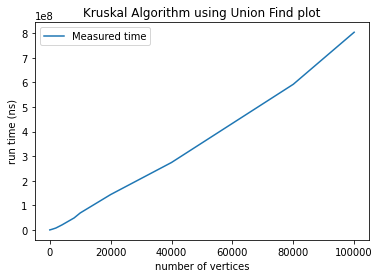

In [ ]:
import matplotlib.pyplot as plt
import os
plt.plot(vertices_size, run_times)
plt.legend(["Measured time"])
plt.ylabel('run time (ns)')
plt.xlabel('number of vertices')
plt.title('Kruskal Algorithm using Union Find plot')
plt.show()